In [41]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import datetime
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV, LassoCV

import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("final_dataset_stocks.csv")
data.head()

Unnamed: 0        date  IBM_open  IBM_high   IBM_low  IBM_close  \
0           0  2012-01-01       NaN       NaN       NaN        NaN   
1           1  2012-01-02       NaN       NaN       NaN        NaN   
2           2  2012-01-03  124.5256  125.8460  124.0388   124.2388   
3           3  2012-01-04  123.7520  124.2589  123.3319   123.7320   
4           4  2012-01-05  123.2452  123.3919  122.1048   123.1452   

   IBM_volume  NASDAQ_open  NASDAQ_high  NASDAQ_low  ...  NASDAQ_Adj_close  \
0         NaN          NaN          NaN         NaN  ...               NaN   
1         NaN          NaN          NaN         NaN  ...               NaN   
2   5646000.0  2657.389893  2665.899902  2641.97998  ...       2648.719971   
3   4346700.0  2639.899902  2653.179932  2627.22998  ...       2648.360107   
4   4463100.0  2642.570068  2673.560059  2631.22998  ...       2669.860107   

   NASDAQ_volume  SP_close  SP_Volume  SP_Open  SP_High   SP_low  \
0            NaN       NaN        NaN      NaN      NaN      NaN   
1            NaN   1257.60         --     0.00     0.00     0.00   
2   1.636850e+09   1277.06         --  1258.86  1284.62  1258.86   
3   1.670530e+09   1277.30         --  1277.03  1278.73  1268.10   
4   1.836410e+09   1281.06         --  1277.30  1283.05  1265.26   

   interest_rate        gdp  yield_rate  
0            NaN  16068.824         NaN  
1              .  16068.824         NaN  
2           2.01  16068.824        1.97  
3           2.08  16068.824        2.00  
4           2.12  16068.824        2.02  

[5 rows x 21 columns]

In [43]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [44]:
#The rows with NaN are days when market was closed. I will be deleting those rows.
data.dropna(inplace=True)
data.head()

date  IBM_open  IBM_high   IBM_low  IBM_close  IBM_volume  \
2  2012-01-03  124.5256  125.8460  124.0388   124.2388   5646000.0   
3  2012-01-04  123.7520  124.2589  123.3319   123.7320   4346700.0   
4  2012-01-05  123.2452  123.3919  122.1048   123.1452   4463100.0   
5  2012-01-06  122.9651  123.0251  121.5780   121.7314   4897100.0   
8  2012-01-09  121.5047  121.5513  120.2176   121.0979   5201200.0   

   NASDAQ_open  NASDAQ_high   NASDAQ_low  NASDAQ_close  NASDAQ_Adj_close  \
2  2657.389893  2665.899902  2641.979980   2648.719971       2648.719971   
3  2639.899902  2653.179932  2627.229980   2648.360107       2648.360107   
4  2642.570068  2673.560059  2631.229980   2669.860107       2669.860107   
5  2671.169922  2682.120117  2658.830078   2674.219971       2674.219971   
8  2682.979980  2683.780029  2662.959961   2676.560059       2676.560059   

   NASDAQ_volume  SP_close SP_Volume  SP_Open  SP_High   SP_low interest_rate  \
2   1.636850e+09   1277.06        --  1258.86  1284.62  1258.86          2.01   
3   1.670530e+09   1277.30        --  1277.03  1278.73  1268.10          2.08   
4   1.836410e+09   1281.06        --  1277.30  1283.05  1265.26          2.12   
5   1.683090e+09   1277.81        --  1280.93  1281.84  1273.34          2.09   
8   1.768080e+09   1280.70        --  1277.83  1281.99  1274.55          2.11   

         gdp yield_rate  
2  16068.824       1.97  
3  16068.824       2.00  
4  16068.824       2.02  
5  16068.824       1.98  
8  16068.824       1.98

In [45]:
data.select_dtypes(include=[object])
data.drop(columns=['SP_Volume'], inplace=True)

In [46]:
#Replacing values in yield_curves
for i in range(len(data)):
  if data.iloc[i,-1] == '.':
    data.iloc[i,-1] = data.iloc[i + 1,-1] 

In [47]:
#Replacing values in interest rate
for i in range(len(data)):
  if data.iloc[i,16] == '.':
    data.iloc[i,16] = data.iloc[i + 1,16] 

In [48]:
#Converting the above columns into float
data['yield_rate'] = data['yield_rate'].astype('float')
data['interest_rate'] = data['interest_rate'].astype('float')

In [49]:
#Finally lets convert date string to datetime format
# for i in range(len(data)):
#   data.iloc[i,0] = datetime.datetime.strptime(data.iloc[i,0], '%Y-%m-%d')

data['date'] = pd.to_numeric(pd.to_datetime(data['date']))
data.head()

date  IBM_open  IBM_high   IBM_low  IBM_close  IBM_volume  \
2  1325548800000000000  124.5256  125.8460  124.0388   124.2388   5646000.0   
3  1325635200000000000  123.7520  124.2589  123.3319   123.7320   4346700.0   
4  1325721600000000000  123.2452  123.3919  122.1048   123.1452   4463100.0   
5  1325808000000000000  122.9651  123.0251  121.5780   121.7314   4897100.0   
8  1326067200000000000  121.5047  121.5513  120.2176   121.0979   5201200.0   

   NASDAQ_open  NASDAQ_high   NASDAQ_low  NASDAQ_close  NASDAQ_Adj_close  \
2  2657.389893  2665.899902  2641.979980   2648.719971       2648.719971   
3  2639.899902  2653.179932  2627.229980   2648.360107       2648.360107   
4  2642.570068  2673.560059  2631.229980   2669.860107       2669.860107   
5  2671.169922  2682.120117  2658.830078   2674.219971       2674.219971   
8  2682.979980  2683.780029  2662.959961   2676.560059       2676.560059   

   NASDAQ_volume  SP_close  SP_Open  SP_High   SP_low  interest_rate  \
2   1.636850e+09   1277.06  1258.86  1284.62  1258.86           2.01   
3   1.670530e+09   1277.30  1277.03  1278.73  1268.10           2.08   
4   1.836410e+09   1281.06  1277.30  1283.05  1265.26           2.12   
5   1.683090e+09   1277.81  1280.93  1281.84  1273.34           2.09   
8   1.768080e+09   1280.70  1277.83  1281.99  1274.55           2.11   

         gdp  yield_rate  
2  16068.824        1.97  
3  16068.824        2.00  
4  16068.824        2.02  
5  16068.824        1.98  
8  16068.824        1.98

In [50]:
# from sklearn import preprocessing
# import pandas as pd
# d = preprocessing.normalize(data, axis=0)
# scaled_df = pd.DataFrame(d)
# scaled_df.columns = ['date', 'IBM_open', 'IBM_high','IBM_low','IBM_close','IBM_volume','NASDAQ_open','NASDAQ_high',	'NASDAQ_low',
#                      'NASDAQ_close','NASDAQ_Adj_close',	'NASDAQ_volume','SP_close',	'SP_Open','SP_High','SP_low','interest_rate','gdp','yield_rate']
# scaled_df.head()

In [51]:
X = data.drop(columns =['IBM_close'])
y = data.IBM_close.values
# X = scaled_df.drop(columns =['IBM_close'])
# y = scaled_df.IBM_close.values
#X, y = np.array(X), np.array(y)

In [52]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train = data[:int(len(data)*0.8)]
X_test = data[int(len(data)*0.8):]
y_train = data.IBM_close[:int(len(data)*0.8)]
y_test = data.IBM_close[int(len(data)*0.8):]

display(X_train);
display(X_test)
display(y_train)
display(y_test)

date  IBM_open  IBM_high   IBM_low  IBM_close  \
2     1325548800000000000  124.5256  125.8460  124.0388   124.2388   
3     1325635200000000000  123.7520  124.2589  123.3319   123.7320   
4     1325721600000000000  123.2452  123.3919  122.1048   123.1452   
5     1325808000000000000  122.9651  123.0251  121.5780   121.7314   
8     1326067200000000000  121.5047  121.5513  120.2176   121.0979   
...                   ...       ...       ...       ...        ...   
2879  1574121600000000000  116.5094  116.9413  116.1466   116.1984   
2880  1574208000000000000  115.8010  116.1478  114.6695   115.0582   
2881  1574294400000000000  115.2309  115.8961  114.8681   115.6110   
2882  1574380800000000000  115.9133  116.3107  115.3951   116.0429   
2885  1574640000000000000  116.1552  117.4768  116.0515   117.4509   

      IBM_volume  NASDAQ_open  NASDAQ_high   NASDAQ_low  NASDAQ_close  \
2      5646000.0  2657.389893  2665.899902  2641.979980   2648.719971   
3      4346700.0  2639.899902  2653.179932  2627.229980   2648.360107   
4      4463100.0  2642.570068  2673.560059  2631.229980   2669.860107   
5      4897100.0  2671.169922  2682.120117  2658.830078   2674.219971   
8      5201200.0  2682.979980  2683.780029  2662.959961   2676.560059   
...          ...          ...          ...          ...           ...   
2879   2995004.0  8578.019531  8589.759766  8536.730469   8570.660156   
2880   4138165.0  8543.570313  8578.269531  8468.629883   8526.730469   
2881   3322158.0  8527.870117  8530.730469  8487.290039   8506.209961   
2882   3297397.0  8530.540039  8535.459961  8477.490234   8519.879883   
2885   2590146.0  8559.650391  8633.150391  8559.650391   8632.490234   

      NASDAQ_Adj_close  NASDAQ_volume  SP_close  SP_Open  SP_High   SP_low  \
2          2648.719971   1.636850e+09   1277.06  1258.86  1284.62  1258.86   
3          2648.360107   1.670530e+09   1277.30  1277.03  1278.73  1268.10   
4          2669.860107   1.836410e+09   1281.06  1277.30  1283.05  1265.26   
5          2674.219971   1.683090e+09   1277.81  1280.93  1281.84  1273.34   
8          2676.560059   1.768080e+09   1280.70  1277.83  1281.99  1274.55   
...                ...            ...       ...      ...      ...      ...   
2879       8570.660156   2.075000e+09   3120.18  3127.45  3127.64  3113.47   
2880       8526.730469   2.596030e+09   3108.46  3114.66  3118.97  3091.41   
2881       8506.209961   2.056230e+09   3103.54  3108.49  3110.11  3094.55   
2882       8519.879883   1.877090e+09   3110.29  3111.41  3112.87  3099.26   
2885       8632.490234   2.256070e+09   3133.64  3117.44  3133.83  3117.44   

      interest_rate        gdp  yield_rate  
2              2.01  16068.824        1.97  
3              2.08  16068.824        2.00  
4              2.12  16068.824        2.02  
5              2.09  16068.824        1.98  
8              2.11  16068.824        1.98  
...             ...        ...         ...  
2879           1.63  21694.458        1.79  
2880           1.60  21694.458        1.73  
2881           1.63  21694.458        1.77  
2882           1.62  21694.458        1.77  
2885           1.62  21694.458        1.76  

[1988 rows x 19 columns]

date  IBM_open  IBM_high   IBM_low  IBM_close  \
2886  1574726400000000000  117.6064  117.6064  116.4143   116.6908   
2887  1574812800000000000  116.9153  117.2263  115.4210   115.5505   
2889  1574985600000000000  115.4037  116.1984  114.9113   116.1379   
2892  1575244800000000000  116.1379  116.1811  114.4362   114.8077   
2893  1575331200000000000  114.0216  114.4017  112.8892   114.1253   
...                   ...       ...       ...       ...        ...   
3601  1636502400000000000  121.0000  122.4300  119.9320   120.2200   
3602  1636588800000000000  120.9000  121.7894  120.0800   120.2700   
3603  1636675200000000000  120.0000  120.6400  118.7800   118.9600   
3606  1636934400000000000  119.5400  120.1600  118.3100   118.8700   
3607  1637020800000000000  118.9200  119.9000  118.4200   118.4600   

      IBM_volume   NASDAQ_open   NASDAQ_high    NASDAQ_low  NASDAQ_close  \
2886   3806859.0   8635.400391   8659.730469   8625.620117   8647.929688   
2887   3280699.0   8669.589844   8705.910156   8662.580078   8705.179688   
2889   1825255.0   8682.009766   8697.320313   8664.040039   8665.469727   
2892   3066813.0   8672.839844   8672.839844   8540.160156   8567.990234   
2893   3708102.0   8460.719727   8523.980469   8435.400391   8520.639648   
...          ...           ...           ...           ...           ...   
3601   6267256.0  15753.839844  15867.240234  15543.679688  15622.709961   
3602   4640130.0  15752.080078  15768.030273  15695.769531  15704.280273   
3603   5414749.0  15752.620117  15874.570313  15705.379883  15860.959961   
3606   5043860.0  15894.820313  15918.450195  15778.309570  15853.849609   
3607   4581165.0  15840.320313  15989.610352  15825.000000  15973.860352   

      NASDAQ_Adj_close  NASDAQ_volume  SP_close  SP_Open  SP_High   SP_low  \
2886       8647.929688   2.434570e+09   3140.52  3134.85  3142.69  3131.00   
2887       8705.179688   1.744580e+09   3153.63  3145.49  3154.26  3143.41   
2889       8665.469727   1.099090e+09   3140.98  3147.18  3150.30  3139.34   
2892       8567.990234   2.225940e+09   3113.87  3143.85  3144.31  3110.78   
2893       8520.639648   2.308600e+09   3093.20  3087.41  3094.97  3070.33   
...                ...            ...       ...      ...      ...      ...   
3601      15622.709961   5.336480e+09   4646.71  4670.26  4684.85  4630.86   
3602      15704.280273   4.520600e+09   4649.27  4659.39  4664.55  4648.31   
3603      15860.959961   5.412870e+09   4682.85  4655.24  4688.47  4650.77   
3606      15853.849609   4.978040e+09   4682.80  4689.30  4697.42  4672.86   
3607      15973.860352   5.441150e+09   4700.90  4679.42  4714.95  4679.42   

      interest_rate        gdp  yield_rate  
2886           1.62  21694.458        1.74  
2887           1.63  21694.458        1.77  
2889           1.61  21694.458        1.78  
2892           1.65  21694.458        1.83  
2893           1.63  21694.458        1.72  
...             ...        ...         ...  
3601           2.70  23173.496        1.56  
3602           2.73  23173.496        1.58  
3603           2.73  23173.496        1.58  
3606           2.76  23173.496        1.63  
3607           2.73  23173.496        1.63  

[498 rows x 19 columns]

2       124.2388
3       123.7320
4       123.1452
5       121.7314
8       121.0979
          ...   
2879    116.1984
2880    115.0582
2881    115.6110
2882    116.0429
2885    117.4509
Name: IBM_close, Length: 1988, dtype: float64

2886    116.6908
2887    115.5505
2889    116.1379
2892    114.8077
2893    114.1253
          ...   
3601    120.2200
3602    120.2700
3603    118.9600
3606    118.8700
3607    118.4600
Name: IBM_close, Length: 498, dtype: float64

In [20]:
#LINEAR REGRESSION MODEL
model = LinearRegression().fit(X_train, y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cvsc = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
#scores = np.absolute(scores)
print((np.mean(cvsc), np.std(cvsc)))

#predicted y values
y_pred = model.predict(X_test)



(-38.523711474151504, 31.50384545706065)


In [21]:
from sklearn.metrics import mean_squared_error
rmse_linear = (mean_squared_error(y_test,y_pred))
print(rmse_linear)


print(np.square(np.subtract(y_test,y_pred)).mean())

y_true = [3, -0.5, 2, 7]
y_d = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_d)

218.2594980514633
218.25949805146342


0.375

In [22]:
#parameter tuning
# define model
ridgemodelalpha = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(ridgemodelalpha, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train,y_train)
# summarize
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.61187e-43): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=1.0194e-43): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=5.1687e-44): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.5811e-43): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/andyc/opt/anaconda3/lib/python3.

MSE: -0.000
Config: {'alpha': 0.0}


/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.53366e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.76737e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.79734e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.66134e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/andyc/opt/anaconda3/lib/pytho

In [23]:
#RIDGE REGRESSION
#can also test around with the alpha value, currently set to the default 1
ridgemodel = Ridge(alpha=0.99)

#k=5 or 10 is very common that generally result in a model skill estimate with low bias a modest variance
#can change this later
#repeat this process 3 times to get an average 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#evaluate the model
scores = cross_val_score(ridgemodel, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print((np.mean(scores), np.std(scores)))

#making predictions on test data
#first fit the data
ridgemodel.fit(X_train,y_train)
y_pred2 = ridgemodel.predict(X_test)
#print(y_pred2)
# summarize chosen configuration
#print('alpha: %f' % model.alpha_)

(2.28589616739151e-06, 4.649929380250536e-07)


/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.76737e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.79734e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.66134e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=9.71739e-37): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Users/andyc/opt/anaconda3/lib/pytho

In [24]:
rmse_ridge = np.sqrt(mean_squared_error(y_test,y_pred2))
print(rmse_ridge)

0.002159320751071638


In [25]:
#parameter tuning
# define model
lassomodelalpha = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(lassomodelalpha, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train,y_train)
# summarize
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  m

MSE: -0.006
Config: {'alpha': 0.25}


/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.053e+02, tolerance: 2.521e+01
  model = cd_fast.enet_coordinate_descent(


In [26]:
#LASSO REGRESSION
#can also test around with the alpha value, currently set to the default 1
lassomodel = Lasso(alpha=0.01)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(lassomodel, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print((np.mean(scores), np.std(scores)))

#making predictions on test data
#first fit the data
lassomodel.fit(X_train,y_train)
y_pred3 = lassomodel.predict(X_test)
#print(y_pred3)

(0.013865074009293259, 0.002062060511367414)


/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.520e+01, tolerance: 2.252e+01
  model = cd_fast.enet_coordinate_descent(
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e+01, tolerance: 2.253e+01
  model = cd_fast.enet_coordinate_descent(
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

In [27]:
rmse_lasso = np.sqrt(mean_squared_error(y_test,y_pred3))
print(rmse_lasso)

0.25404439832219783


In [28]:
#parameter tuning
# define model
elasticmodelalpha = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(elasticmodelalpha, grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train,y_train)
# summarize
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


# # define model evaluation method
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # define model
# ratios = arange(0, 1, 0.01)
# alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
# elasticmodelalpha = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# # fit model
# elasticmodelalpha.fit(X_train,y_train)
# # summarize chosen configuration
# print('alpha: %f' % elasticmodelalpha.alpha_)
# print('l1_ratio_: %f' % elasticmodelalpha.l1_ratio_)

/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.240e+01, tolerance: 2.228e+01
  model = cd_fast.enet_coordinate_descent(
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.286e+01, tolerance: 2.283e+01
  model = cd_fast.enet_coordinate_descent(
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

MSE: -0.006
Config: {'alpha': 0.1, 'l1_ratio': 0.99}


/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.540e+04, tolerance: 2.279e+01
  model = cd_fast.enet_coordinate_descent(
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.578e+04, tolerance: 2.269e+01
  model = cd_fast.enet_coordinate_descent(
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

In [29]:
#ELASTIC NET REGRESSION
elasticmodel = ElasticNet(alpha=0.01, l1_ratio=0.56)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(elasticmodel, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print((np.mean(scores), np.std(scores)))

#making predictions on test data
#first fit the data
elasticmodel.fit(X_train,y_train)
y_pred4 = elasticmodel.predict(X_test)
#print(y_pred4)

(0.015542947838413946, 0.002334655433043646)


/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.946e+01, tolerance: 2.252e+01
  model = cd_fast.enet_coordinate_descent(
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.972e+01, tolerance: 2.253e+01
  model = cd_fast.enet_coordinate_descent(
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

In [30]:
rmse_elastic = np.sqrt(mean_squared_error(y_test,y_pred4))
print(rmse_elastic)

0.260063344106004


In [31]:
#this converts the numeric date back to datetime (just to make the graph prettier)
#this is for actual date
for i in range(len(data)):
  your_timestamp = data.iloc[i,0]
  date = datetime.datetime.fromtimestamp(your_timestamp/1e9)
  data.iloc[i,0] = date.date()
data.date = pd.to_datetime(data['date'])

#this is for the X_test
for i in range(len(X_test)):
  your_timestamp = X_test.iloc[i,0]
  date = datetime.datetime.fromtimestamp(your_timestamp/1e9)
  X_test.iloc[i,0] = date.date()
X_test.date = pd.to_datetime(X_test['date'])


/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


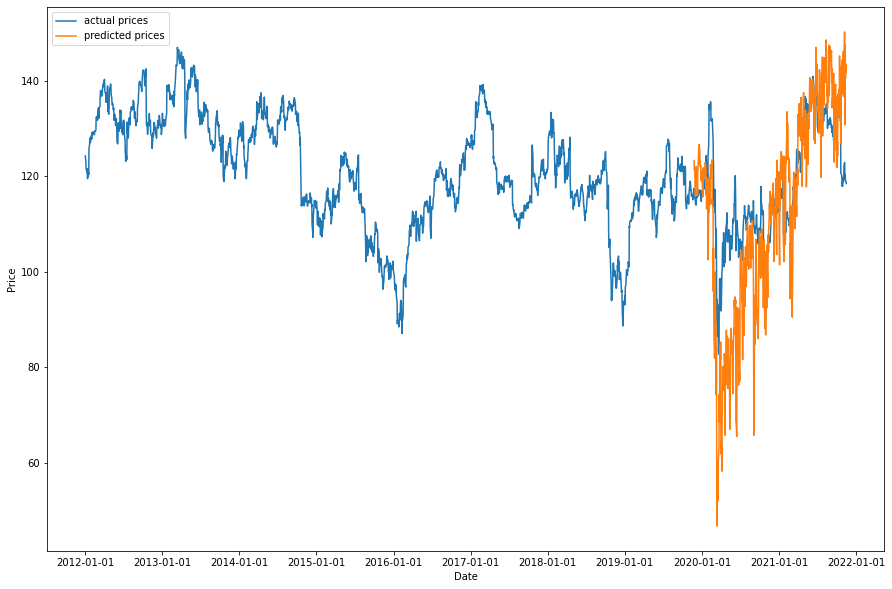

In [32]:
#plots
# this increases the figure size for added viewability
from pylab import rcParams
from matplotlib.dates import DateFormatter
rcParams['figure.figsize'] = 15, 10

#plots the linear regression model
plt.plot(data['date'],y, label ="actual prices")
ax = sns.lineplot(X_test['date'],y_pred, label ="predicted prices")

date_form = DateFormatter("20%y-%d-%m")
ax.xaxis.set_major_formatter(date_form)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


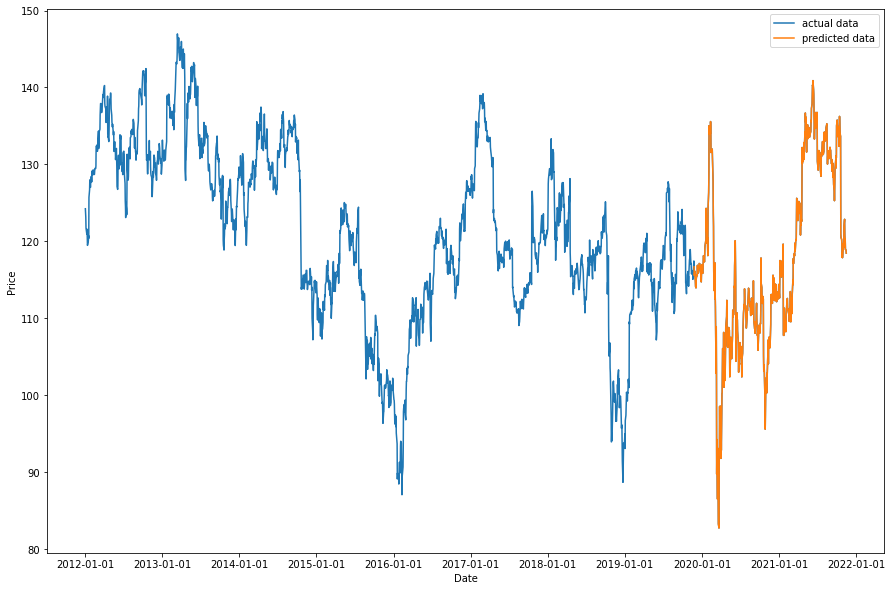

In [34]:
#plots the ridge regression model
plt.plot(data['date'],y, label ="actual data")
ax = sns.lineplot(X_test['date'],y_pred2, label ="predicted data")

date_form = DateFormatter("20%y-%d-%m")
ax.xaxis.set_major_formatter(date_form)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


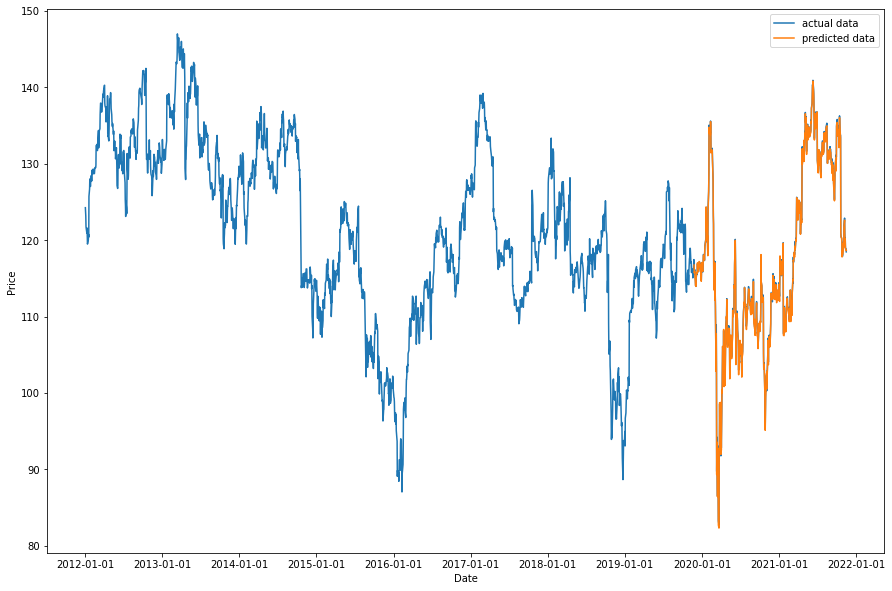

In [35]:
#plots the lasso regression model
plt.plot(data['date'],y, label ="actual data")
ax = sns.lineplot(X_test['date'],y_pred3, label ="predicted data")

date_form = DateFormatter("20%y-%d-%m")
ax.xaxis.set_major_formatter(date_form)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

/Users/andyc/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


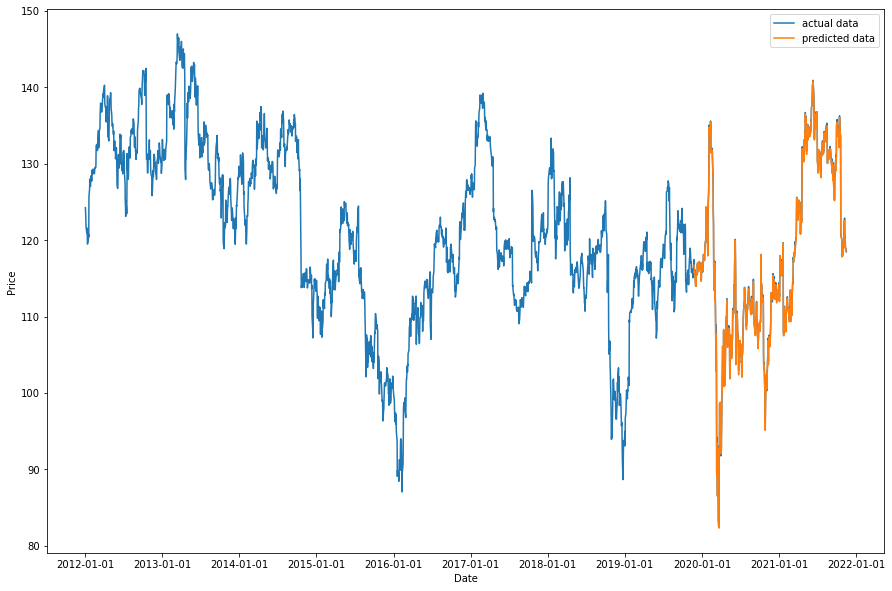

In [36]:
#plots the elastic net regression model
plt.plot(data['date'],y, label ="actual data")
ax = sns.lineplot(X_test['date'],y_pred4, label ="predicted data")

date_form = DateFormatter("20%y-%d-%m")
ax.xaxis.set_major_formatter(date_form)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [39]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))
print(np.sqrt(mean_squared_error(y_test,y_pred2)))
print(np.sqrt(mean_squared_error(y_test,y_pred3)))
print(np.sqrt(mean_squared_error(y_test,y_pred4)))

14.773608159534465
0.002159320751071638
0.25404439832219783
0.260063344106004


# RF

In [55]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import datetime

import matplotlib.pyplot as plt

In [58]:
rf = RandomForestRegressor(n_estimators=6000, max_depth=14, n_jobs=-1, random_state=1,max_features=5,min_samples_leaf=2)
#drop_train = X_train.drop(columns=['IBM_open'],inplace=True)
# X_train = data[:int(len(data)*0.8)]
# y_train = data.IBM_close[:int(len(data)*0.8)]
# X_train.drop(columns=['IBM_close'],inplace=True)
# X_test = data[int(len(data)*0.8):]
# y_test = data.IBM_close[int(len(data)*0.8):]
# X_test.drop(columns=['IBM_close'],inplace=True)
# drop_train = X_train
# display(drop_train)
# drop_train.drop(columns=['IBM_high'],inplace=True)
# drop_train.drop(columns=['IBM_open'],inplace=True)
#display(drop_train.head())
rf.fit(X_train, y_train)
ypr_rf = rf.predict(X_test)

# sum((ypr_rf-y_test)**2)/len(ypr_rf)



print(ypr_rf)

[116.87721651 115.90227747 115.89574567 115.05703741 114.1933922
 114.38719197 114.30478949 115.19977732 115.74559367 115.80812733
 115.75302683 116.7588365  116.15040635 116.03778233 116.00021425
 116.16637084 116.16444164 117.16394839 117.1156912  116.60506284
 116.43439183 116.87227371 115.13243726 115.53623462 117.02584384
 116.04434179 115.78110671 115.94560907 116.92989175 117.77885829
 118.24722373 117.6271477  117.43062547 118.05754218 119.08538863
 119.23128046 119.93496946 124.35745318 123.60309318 121.86731338
 120.04401262 120.73498654 119.42560287 117.82422279 123.6158514
 125.88079708 127.90656646 132.40873762 132.98366887 133.18135089
 133.06875371 133.07375659 133.95987159 133.42072336 131.36258417
 130.94623098 131.2086335  131.07088724 130.35966958 127.50539466
 124.87000537 122.697184   117.42507279 113.19768187 115.86710548
 114.63482287 116.19521335 113.58967521 111.40010833 104.03541747
 107.29504069 103.93813227  93.59227377  94.6057056   92.52762725
  93.6473342

In [59]:
len(ypr_rf)

498

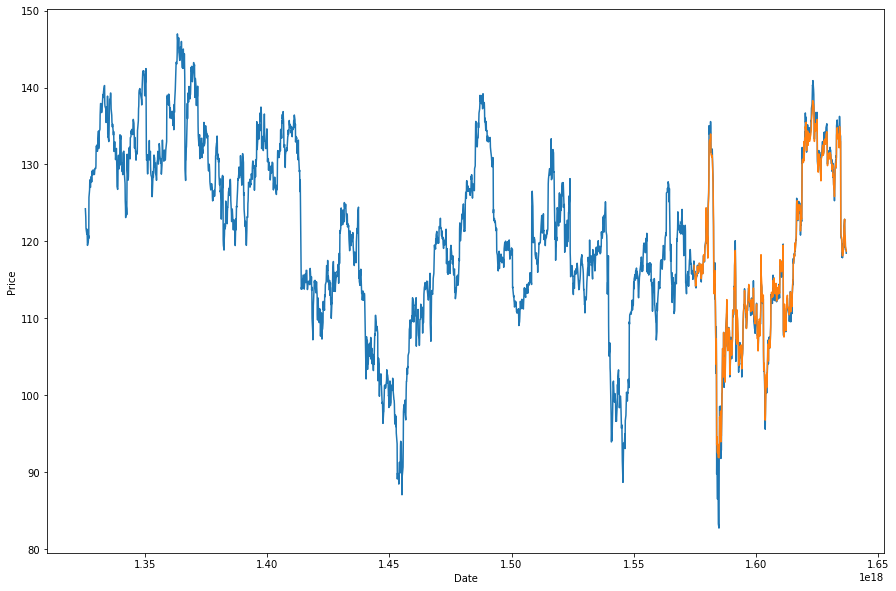

In [64]:
#plots the RF regression model
plt.plot(data['date'],y, label ="actual data")
plt.plot(X_test['date'],ypr_rf, label = "RF")
#ax = sns.lineplot(X_test['date'],ypr_rf, label ="predicted data")

date_form = DateFormatter("20%y-%d-%m")
ax.xaxis.set_major_formatter(date_form)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [65]:
print(np.sqrt(mean_squared_error(y_test,ypr_rf)))

0.9794831981422593


In [68]:
importances = rf.feature_importances_
print(importances)

[0.04826602 0.12971031 0.20255748 0.21083752 0.2940438  0.0003262
 0.00503827 0.01671206 0.00336984 0.00799956 0.00938885 0.00036863
 0.00356336 0.00240586 0.00488969 0.00337105 0.02315173 0.03252698
 0.00147277]


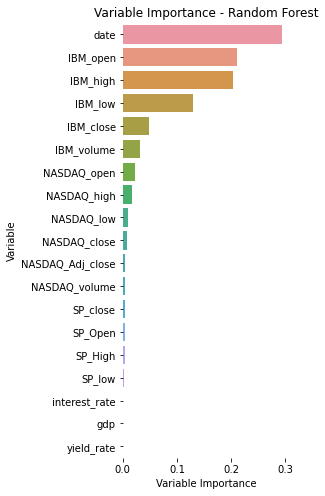

In [69]:
#Plot variable importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] 

f, ax = plt.subplots(figsize=(3,8))
sns.barplot(y=X_test.columns,x=importances[indices],label="Total")
plt.title("Variable Importance - Random Forest")
ax.set(ylabel="Variable",xlabel="Variable Importance")
sns.despine(left=True, bottom=True)
plt.show()

# XGB

In [71]:
from xgboost import XGBRegressor

In [75]:
xgb_best =XGBRegressor(max_depth=11,gamma=0.75,learning_rate=0.1,random_state=0)
xgb_best.fit(X_train,y_train)
ypred_bestxgb = xgb_best.predict(X_test)

In [76]:
print(np.sqrt(mean_squared_error(y_test,ypred_bestxgb)))

0.3871708527447551


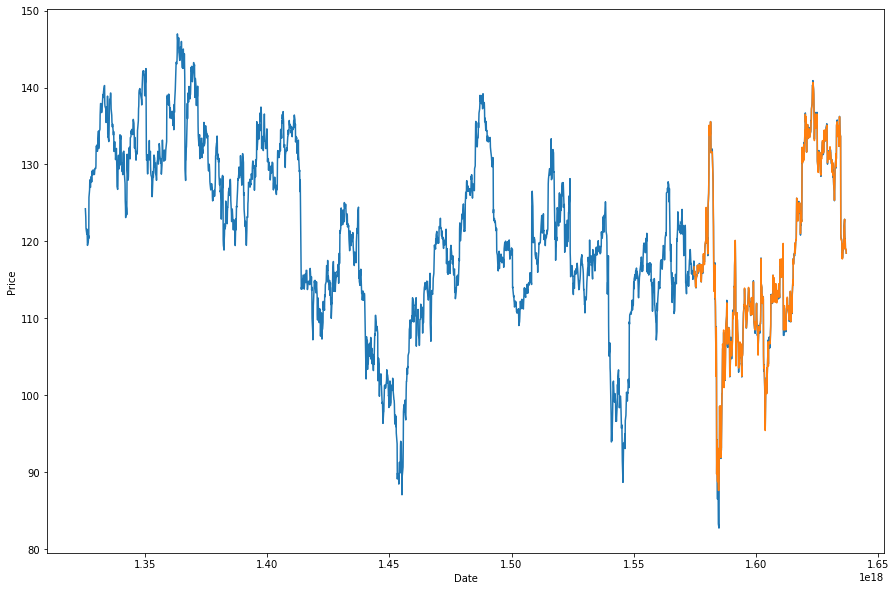

In [79]:
#plots the RF regression model
plt.plot(data['date'],y, label ="actual data")
plt.plot(X_test['date'],ypred_bestxgb, label = "XG")
#ax = sns.lineplot(X_test['date'],ypred_bestxgb, label ="predicted data")

date_form = DateFormatter("20%y-%d-%m")
ax.xaxis.set_major_formatter(date_form)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
